In [ ]:
# !pip uninstall tensorflow tensorflow-tensorboard tensorflow-estimator
!pip install gdown
!pip install tensorflow-gpu

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import RobustScaler

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

f_transformer = RobustScaler()
p_transformer = RobustScaler()

In [34]:
df = pd.read_csv(
  "/home/jovyan/work/training_data/sw_training_data.csv", 
  parse_dates=['read_date'], 
  index_col="read_date"
)

In [35]:
df = df.drop(['bl_meter1','bl_meter2','bl_meter3','bl_ahd3','mean_temp3','bl_meter4','bl_ahd4','mean_temp4','sl_meter','rf_meter'
             ],axis=1)

In [36]:
df.shape

(5297, 6)

In [37]:
df.head()

,sl_read1,bl_ahd1,mean_temp1,bl_ahd2,mean_temp2,rf_read1
read_date,,,,,,
2005-12-02,0.295,253.271,19.800,251.641,21.400,19.8
2005-12-03,0.303,253.277,19.825,251.644,21.350,21.4
2005-12-04,0.307,253.278,19.800,251.639,21.375,0.0
2005-12-05,0.303,253.275,19.824,251.636,21.375,0.0
2005-12-06,0.304,253.273,19.801,251.638,21.400,0.0


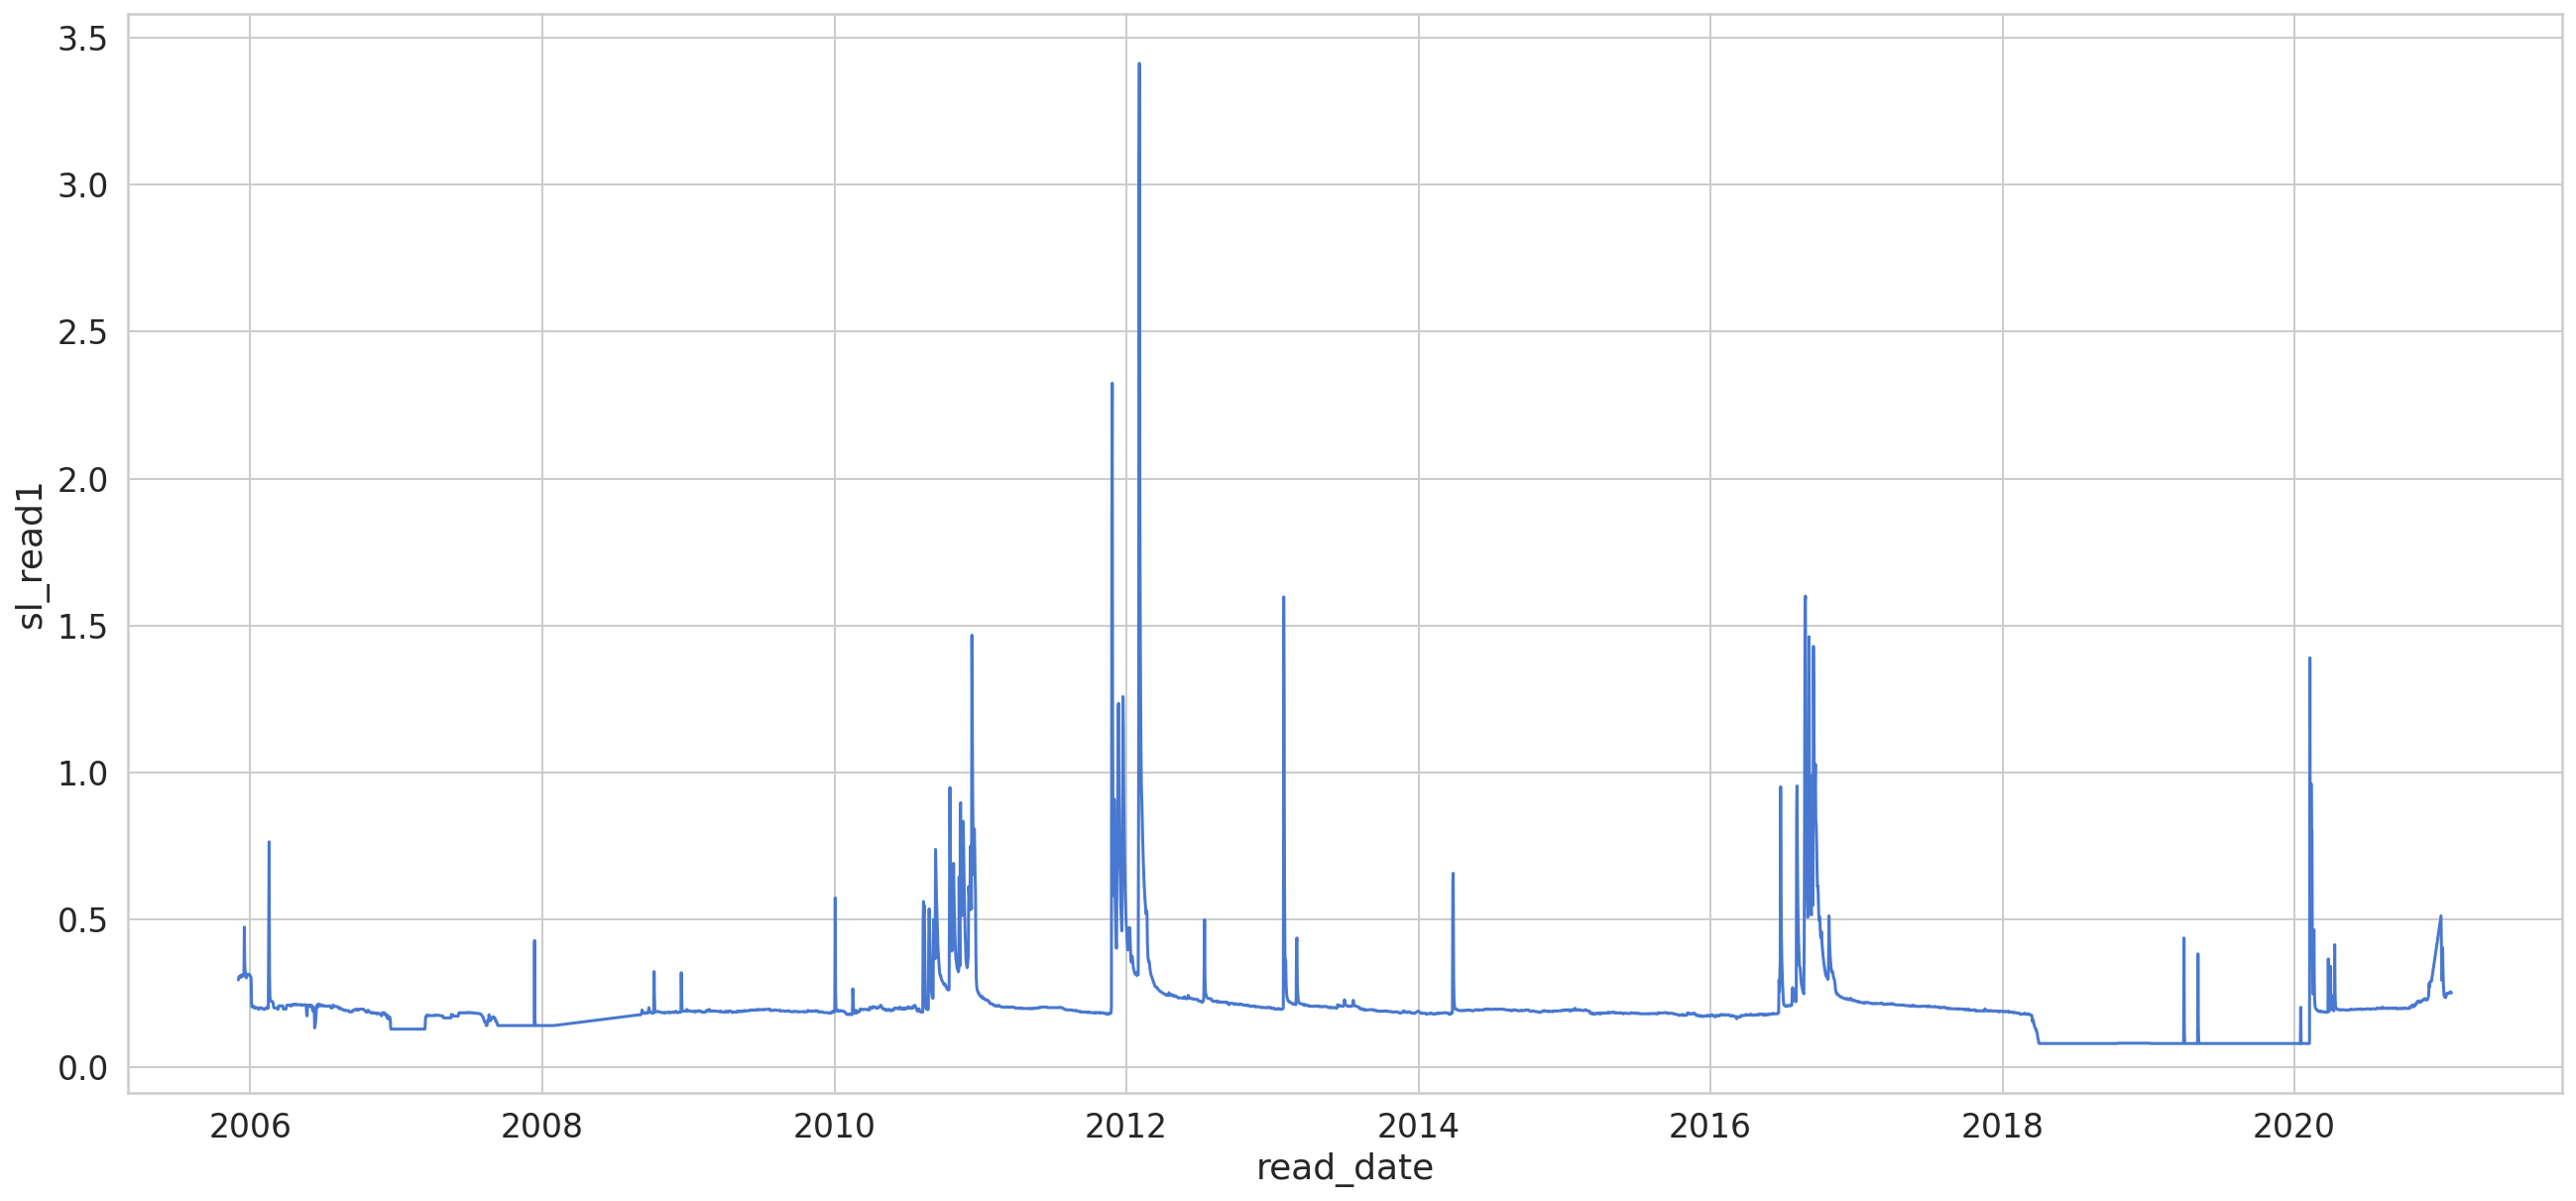

In [38]:
sns.lineplot(x=df.index, y="sl_read1", data=df);

In [39]:

# read_date sl_read1 	bl_ahd1 	mean_temp1 	bl_ahd2 	mean_temp2 	rf_read1
def create_data():
    
    df1 = df.copy()
    df2 = df.copy()
    df2 = df2.drop(['mean_temp1','mean_temp2','rf_read1'],axis=1)
    
    #df1, df2 = scale_input(df1,df2) 

    return(df1,df2)

In [75]:
def create_train(X,Y):
    train_size = int(len(X) * 0.75)
    X_train, Y_train = X[0:train_size], Y[0:train_size]
    print(X_train, Y_train)
    return X_train, Y_train

In [76]:
def create_test(X,Y):
    train_size = int(len(X) * 0.75)
    test_size = len(X) - train_size
    X_test, Y_test = X[train_size:(train_size + test_size)], Y[train_size:(train_size + test_size)]
    print(X_test, Y_test)
    return X_test, Y_test

In [77]:
def create_dataset(datax, datay, step):
    X, Y = [], []
    for i in range(len(datax) - step):
        d = i + step  
        X.append(datax[i:d,])
        Y.append(datay[d])
        
    return np.array(X), np.array(Y)

In [43]:
def create_dataset0(XX, yy, time_steps=1):
    XXs, yys = [], []
    for i in range(len(XX) - time_steps):
        v = XX.iloc[i:(i + time_steps)].values
        XXs.append(v)        
        yys.append(yy.iloc[i + time_steps])
    return np.array(XXs), np.array(yys)

In [44]:
#def create_lineplot(X_train, X_test):
#    
#    print (X_train)
#    sns.lineplot(x=X_train.index, y=X_train[0], data=X_train);
#    sns.lineplot(x=X_test.index, y=X_test[0], data=X_test);
#    
#    #sns.lineplot(x=X_train.index, y="sl_read1", data=X_train);
#    #sns.lineplot(x=X_test.index, y="sl_read1", data=X_test);

In [78]:
time_steps = 10

Xs,Ys = create_data()

Xs_train, Ys_train = create_train(Xs,Ys) 
Xs_test, Ys_test = create_test(Xs,Ys)

# f_columns = ['bl_ahd1', 'mean_temp1', 'bl_ahd2', 'mean_temp2','rf_read1']
# p_columns = ['sl_read1','bl_ahd1','bl_ahd2']
# 
# f_transformer = f_transformer.fit(Xs_train[f_columns].to_numpy())
# p_transformer = p_transformer.fit(Ys_train[p_columns].to_numpy())
# 
# Xs_train.loc[:, f_columns] = f_transformer.transform(Xs_train[f_columns].to_numpy())
# Ys_train.loc[:, p_columns] = p_transformer.transform(Ys_train[p_columns].to_numpy())

#use create_dataset0() if you use the transformers


Xs_train = Xs_train.to_numpy()
Ys_train = Ys_train.to_numpy()
Xs_test = Xs_test.to_numpy()
Ys_test = Ys_test.to_numpy()


#create_lineplot(pd.DataFrame(Xs_train),pd.DataFrame(Xs_test))
#print(Xs_train.shape, Ys_train.shape)
#print(Xs_test.shape, Ys_test.shape)

# Xs_train, Ys_train = scale_input(Xs_train,Ys_train,)
# Xs_test, Ys_test = scale_input(Xs_test,Ys_test)
# 
#print(Xs_train.shape, Ys_train.shape)
#print(Xs_test.shape, Ys_test.shape)

X_train, Y_train = create_dataset(Xs_train,Ys_train, time_steps)
X_test, Y_test = create_dataset(Xs_test,Ys_test, time_steps)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

            sl_read1  bl_ahd1  mean_temp1  bl_ahd2  mean_temp2  rf_read1
read_date                                                               
2005-12-02     0.295  253.271      19.800  251.641      21.400      19.8
2005-12-03     0.303  253.277      19.825  251.644      21.350      21.4
2005-12-04     0.307  253.278      19.800  251.639      21.375       0.0
2005-12-05     0.303  253.275      19.824  251.636      21.375       0.0
2005-12-06     0.304  253.273      19.801  251.638      21.400       0.0
...              ...      ...         ...      ...         ...       ...
2017-05-17     0.206  253.008      19.751  251.653      20.300       0.0
2017-05-18     0.206  253.008      19.798  251.648      20.300       0.0
2017-05-19     0.206  253.019      19.800  251.656      20.300      13.6
2017-05-20     0.209  253.038      19.800  251.684      20.300      53.2
2017-05-21     0.209  253.034      19.800  251.684      20.300       0.0

[3972 rows x 6 columns]             sl_read1  bl_a

In [66]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=3))
model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
history = model.fit(
    X_train, Y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
112/112 [==============================] - 5s 20ms/step - loss: 40612.8738 - val_loss: 36744.3086
Epoch 2/30
112/112 [==============================] - 2s 16ms/step - loss: 35584.5569 - val_loss: 32358.0488
Epoch 3/30
112/112 [==============================] - 2s 15ms/step - loss: 31352.1348 - val_loss: 28400.3379
Epoch 4/30
112/112 [==============================] - 2s 16ms/step - loss: 27452.3448 - val_loss: 24750.4707
Epoch 5/30
112/112 [==============================] - 2s 16ms/step - loss: 23889.1207 - val_loss: 21525.1152
Epoch 6/30
112/112 [==============================] - 2s 16ms/step - loss: 20770.8644 - val_loss: 18611.5508
Epoch 7/30
112/112 [==============================] - 2s 13ms/step - loss: 17894.5814 - val_loss: 15865.5332
Epoch 8/30
112/112 [==============================] - 2s 15ms/step - loss: 15224.7892 - val_loss: 13358.9336
Epoch 9/30
112/112 [==============================] - 2s 16ms/step - loss: 12781.0705 - val_loss: 11251.6221
Epoch 10/30
112/112

In [80]:
model2 = keras.Sequential()
model2.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model2.add(keras.layers.Dropout(rate=0.2)),
model2.add(keras.layers.Dense(units=32, activation='relu')),
model2.add(keras.layers.Dropout(rate=0.2)),
model2.add(keras.layers.Dense(units=16, activation='relu')),
model2.add(keras.layers.Dense(units=3, activation='linear')),
model2.compile(loss='mean_squared_error', optimizer='adam')
    

In [81]:
history2 = model2.fit(
    X_train, Y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
112/112 [==============================] - 5s 20ms/step - loss: 37348.4966 - val_loss: 2980.6284
Epoch 2/30
112/112 [==============================] - 2s 14ms/step - loss: 1279.4573 - val_loss: 19.5020
Epoch 3/30
112/112 [==============================] - 2s 15ms/step - loss: 659.3119 - val_loss: 36.9047
Epoch 4/30
112/112 [==============================] - 2s 15ms/step - loss: 650.6817 - val_loss: 42.9247
Epoch 5/30
112/112 [==============================] - 2s 14ms/step - loss: 571.4538 - val_loss: 37.5023
Epoch 6/30
112/112 [==============================] - 2s 15ms/step - loss: 596.9417 - val_loss: 24.3499
Epoch 7/30
112/112 [==============================] - 2s 16ms/step - loss: 595.1518 - val_loss: 37.5910
Epoch 8/30
112/112 [==============================] - 2s 16ms/step - loss: 600.0072 - val_loss: 51.9872
Epoch 9/30
112/112 [==============================] - 2s 15ms/step - loss: 599.5405 - val_loss: 27.0852
Epoch 10/30
112/112 [==============================] - 2s 1

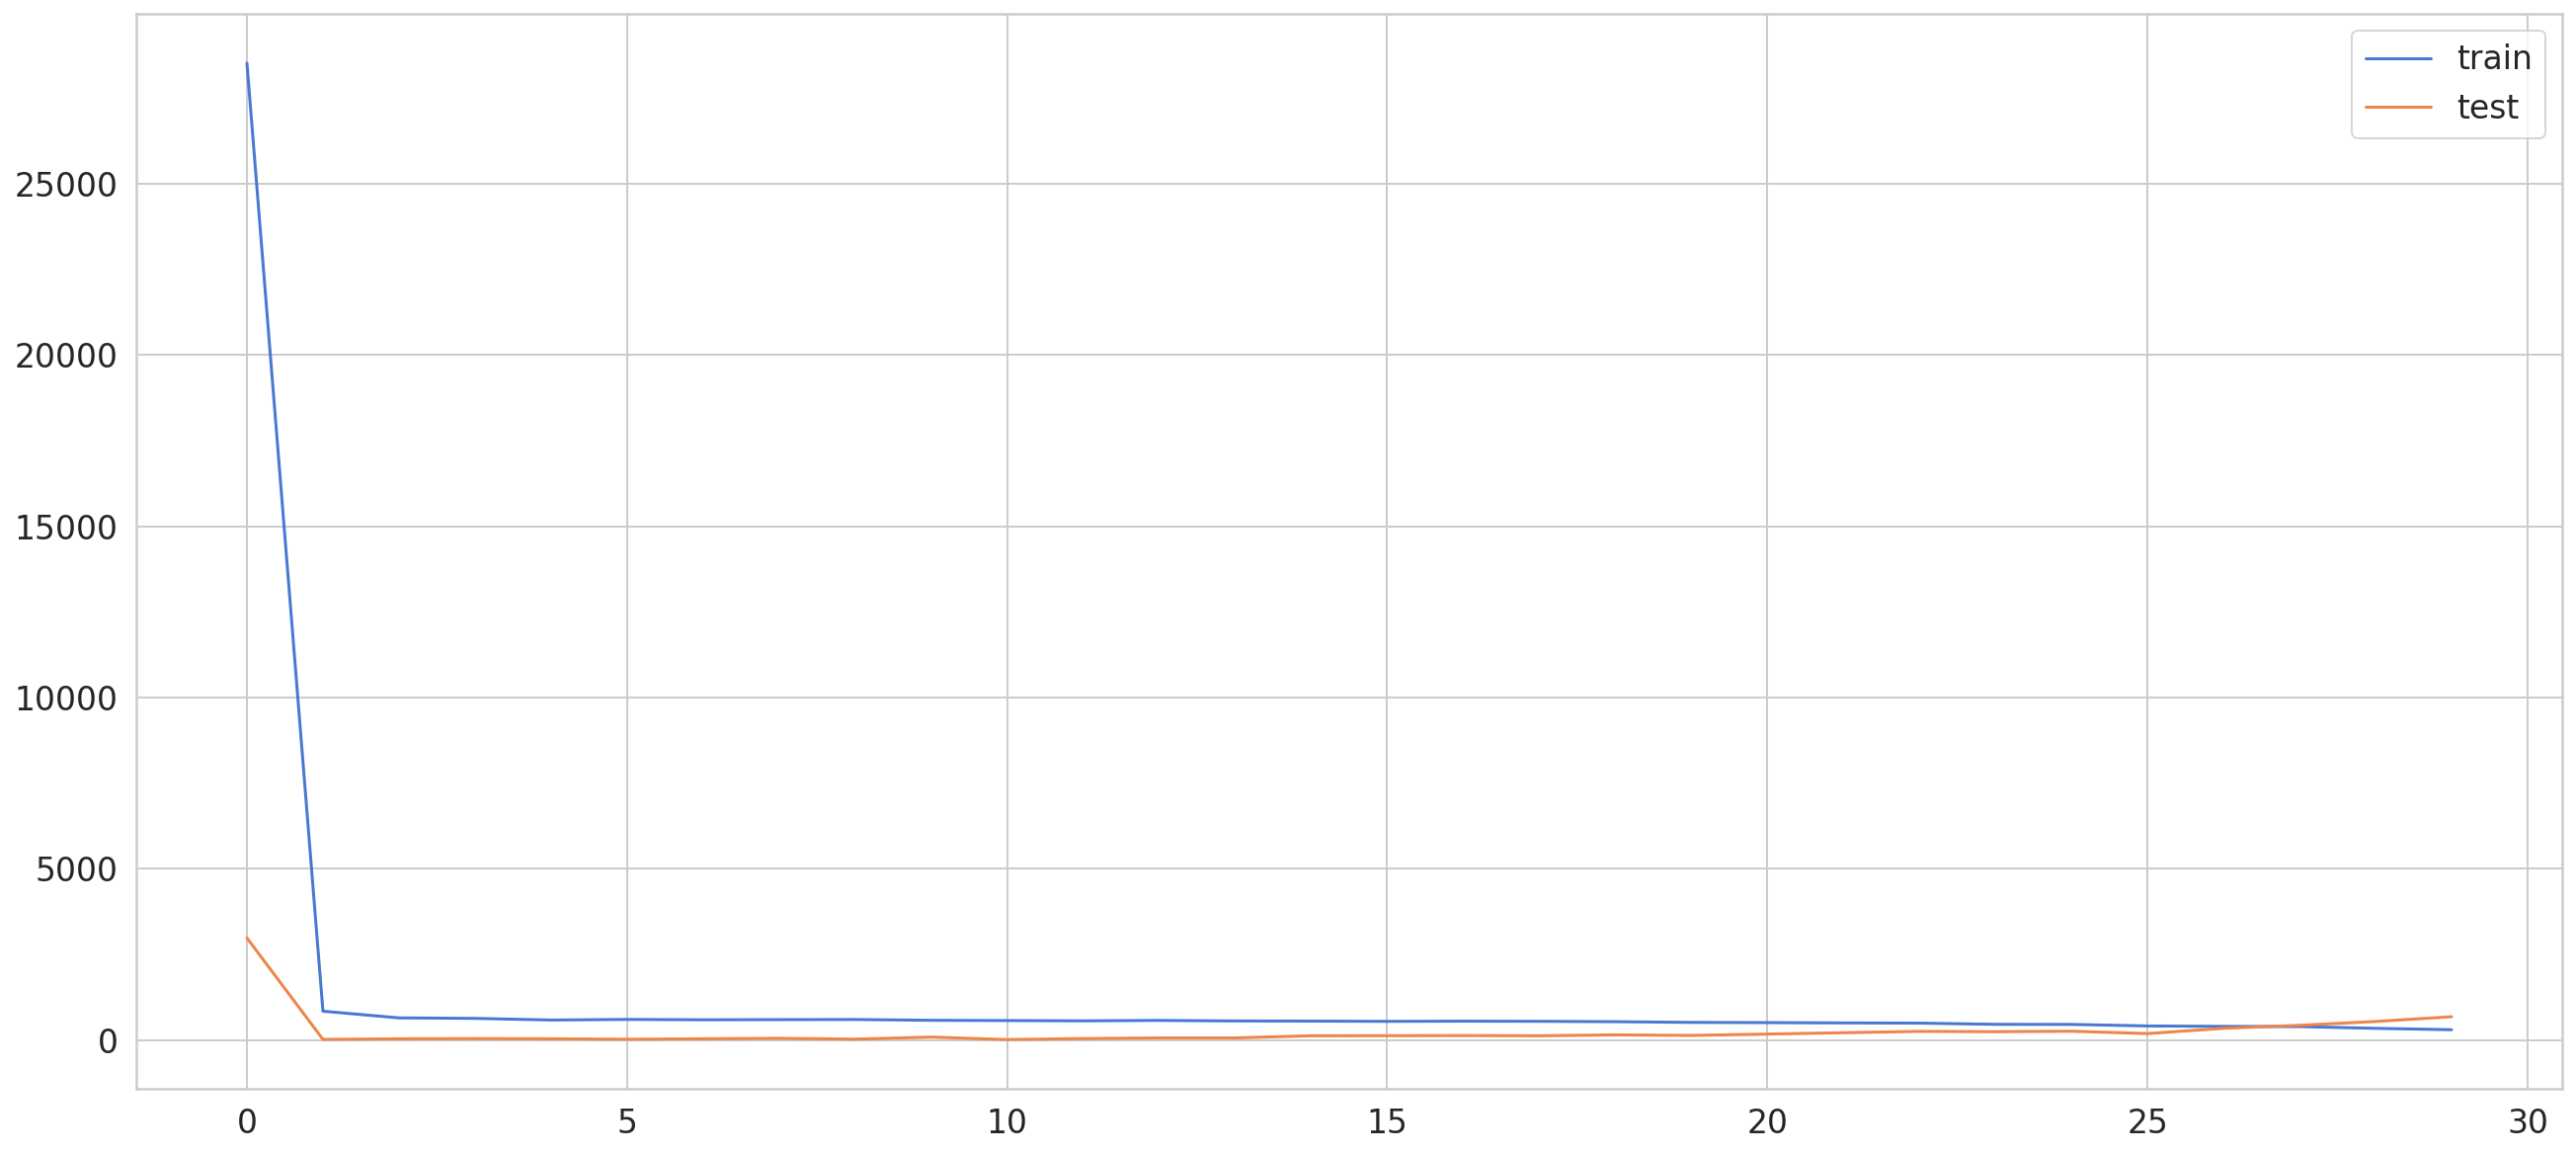

In [82]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend();

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [79]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'val_loss'])


In [69]:
Y_pred = model.predict(X_test)

In [73]:
print(Y_pred)
print(Y_pred.shape)

[[1.8927972e-01 2.4774910e+02 2.4686444e+02]
 [1.8927972e-01 2.4774910e+02 2.4686444e+02]
 [1.8927972e-01 2.4774910e+02 2.4686444e+02]
 ...
 [1.8927966e-01 2.4774910e+02 2.4686444e+02]
 [1.8927971e-01 2.4774910e+02 2.4686444e+02]
 [1.8927971e-01 2.4774910e+02 2.4686444e+02]]
(1315, 3)


In [56]:
#skip

Y_train_inv = p_transformer.inverse_transform(Y_train)  #.reshape(1, -1)
Y_test_inv = p_transformer.inverse_transform(Y_test)    #.reshape(1, -1)
Y_pred_inv = p_transformer.inverse_transform(Y_pred)

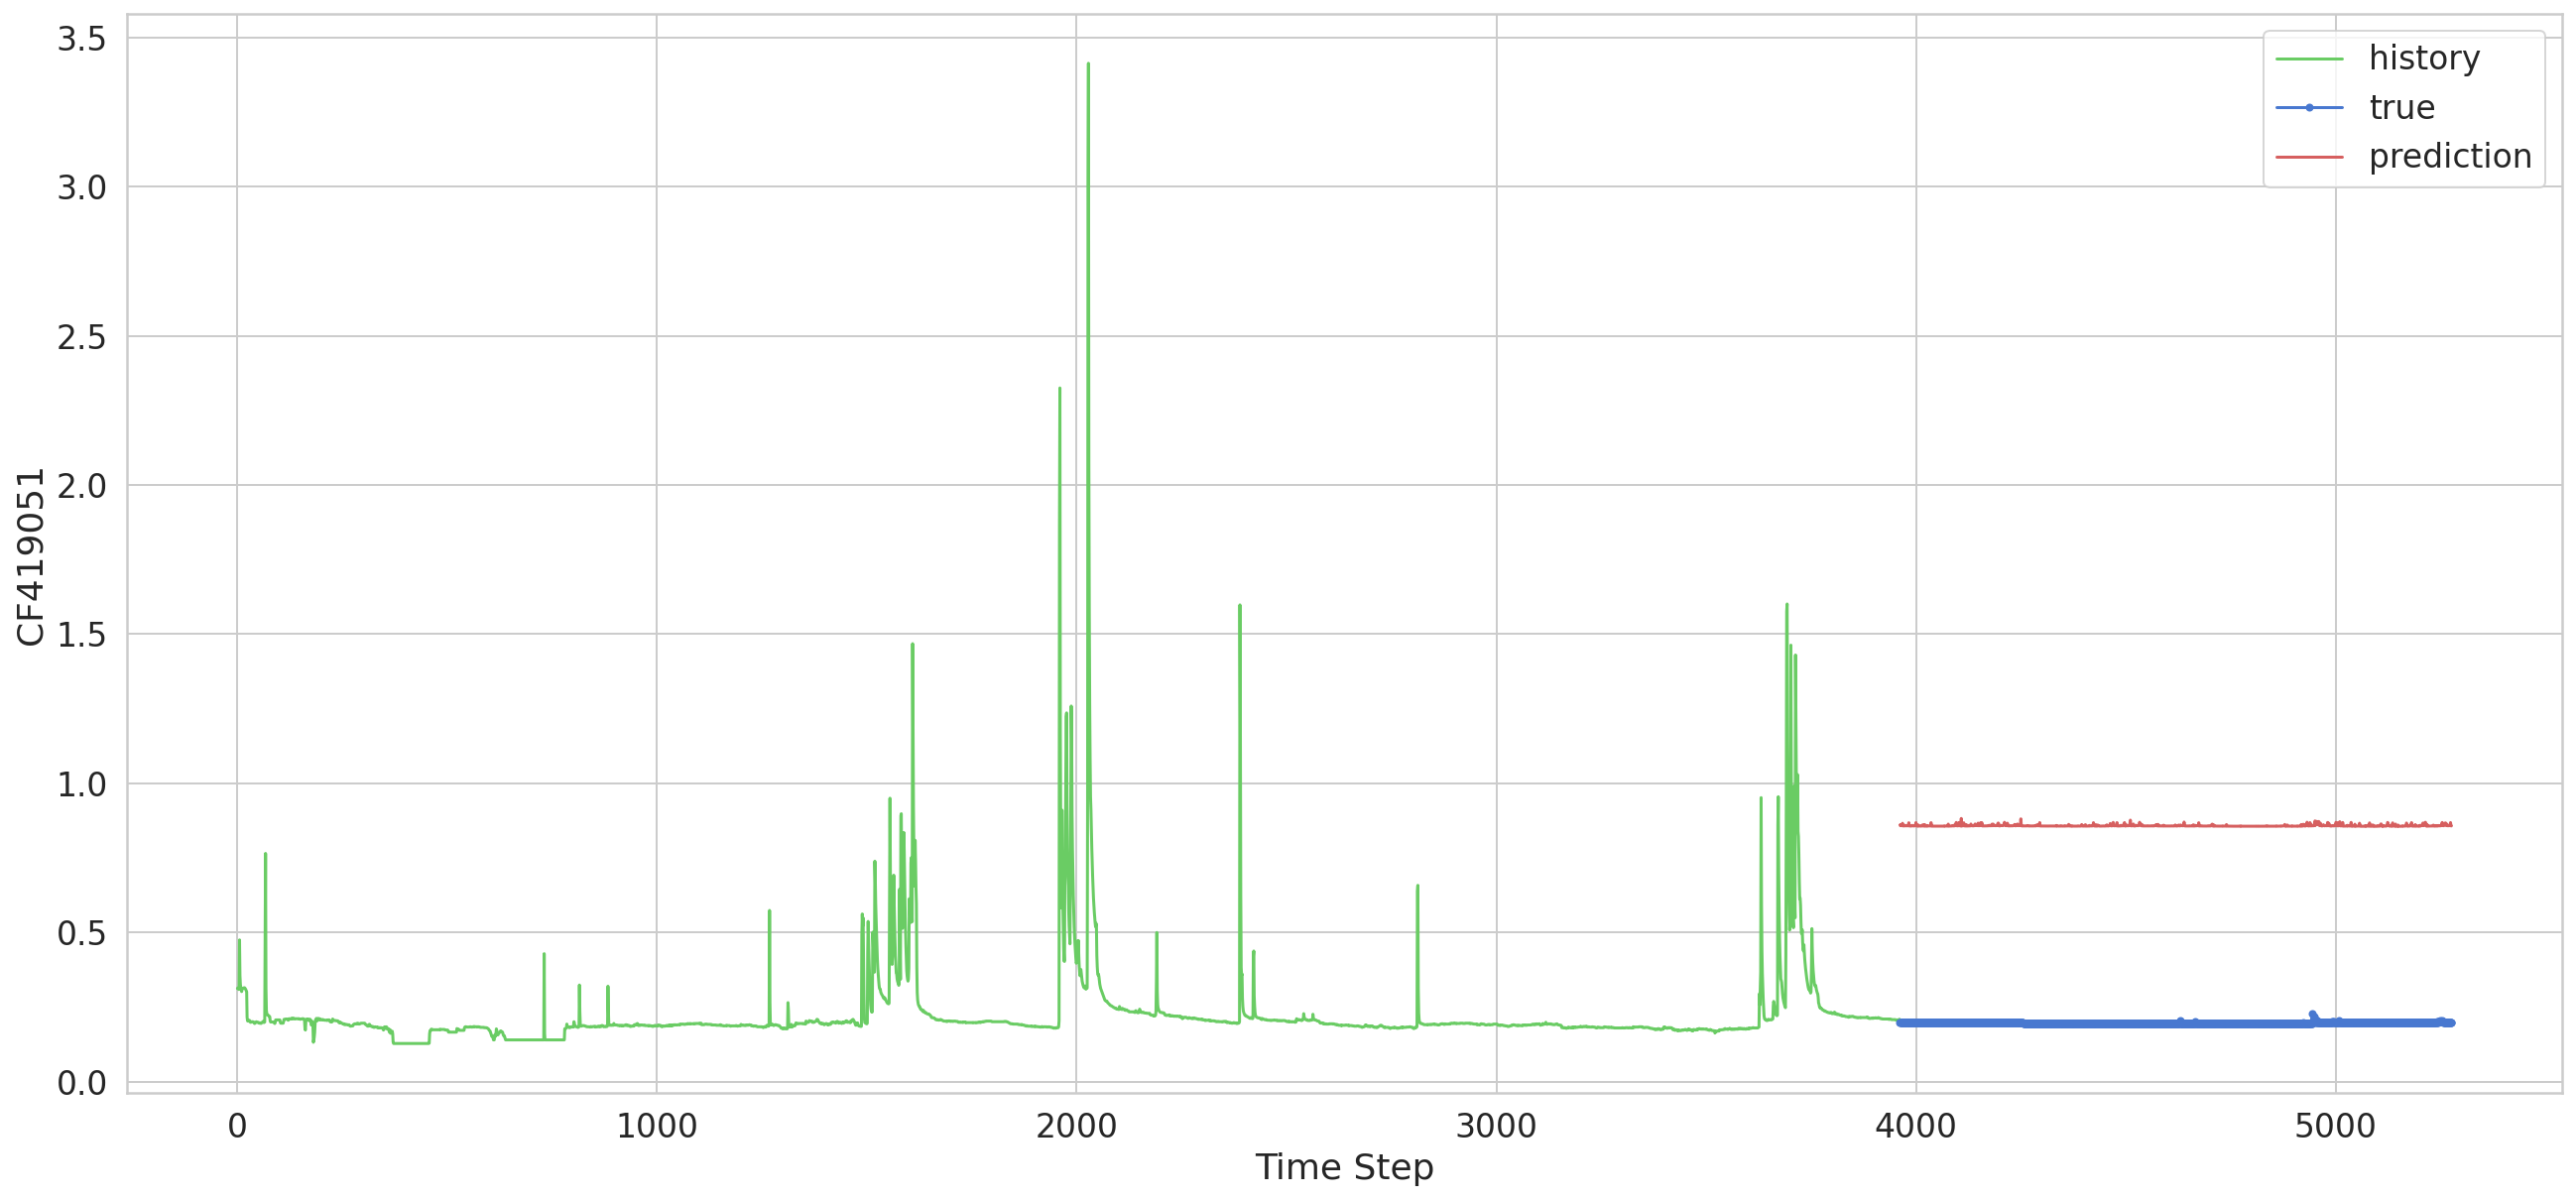

In [58]:
plt.plot(np.arange(0, len(Y_train)), Y_train_inv[:,0].flatten(), 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test_inv[:,0].flatten(), marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred_inv[:,0].flatten(), 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();

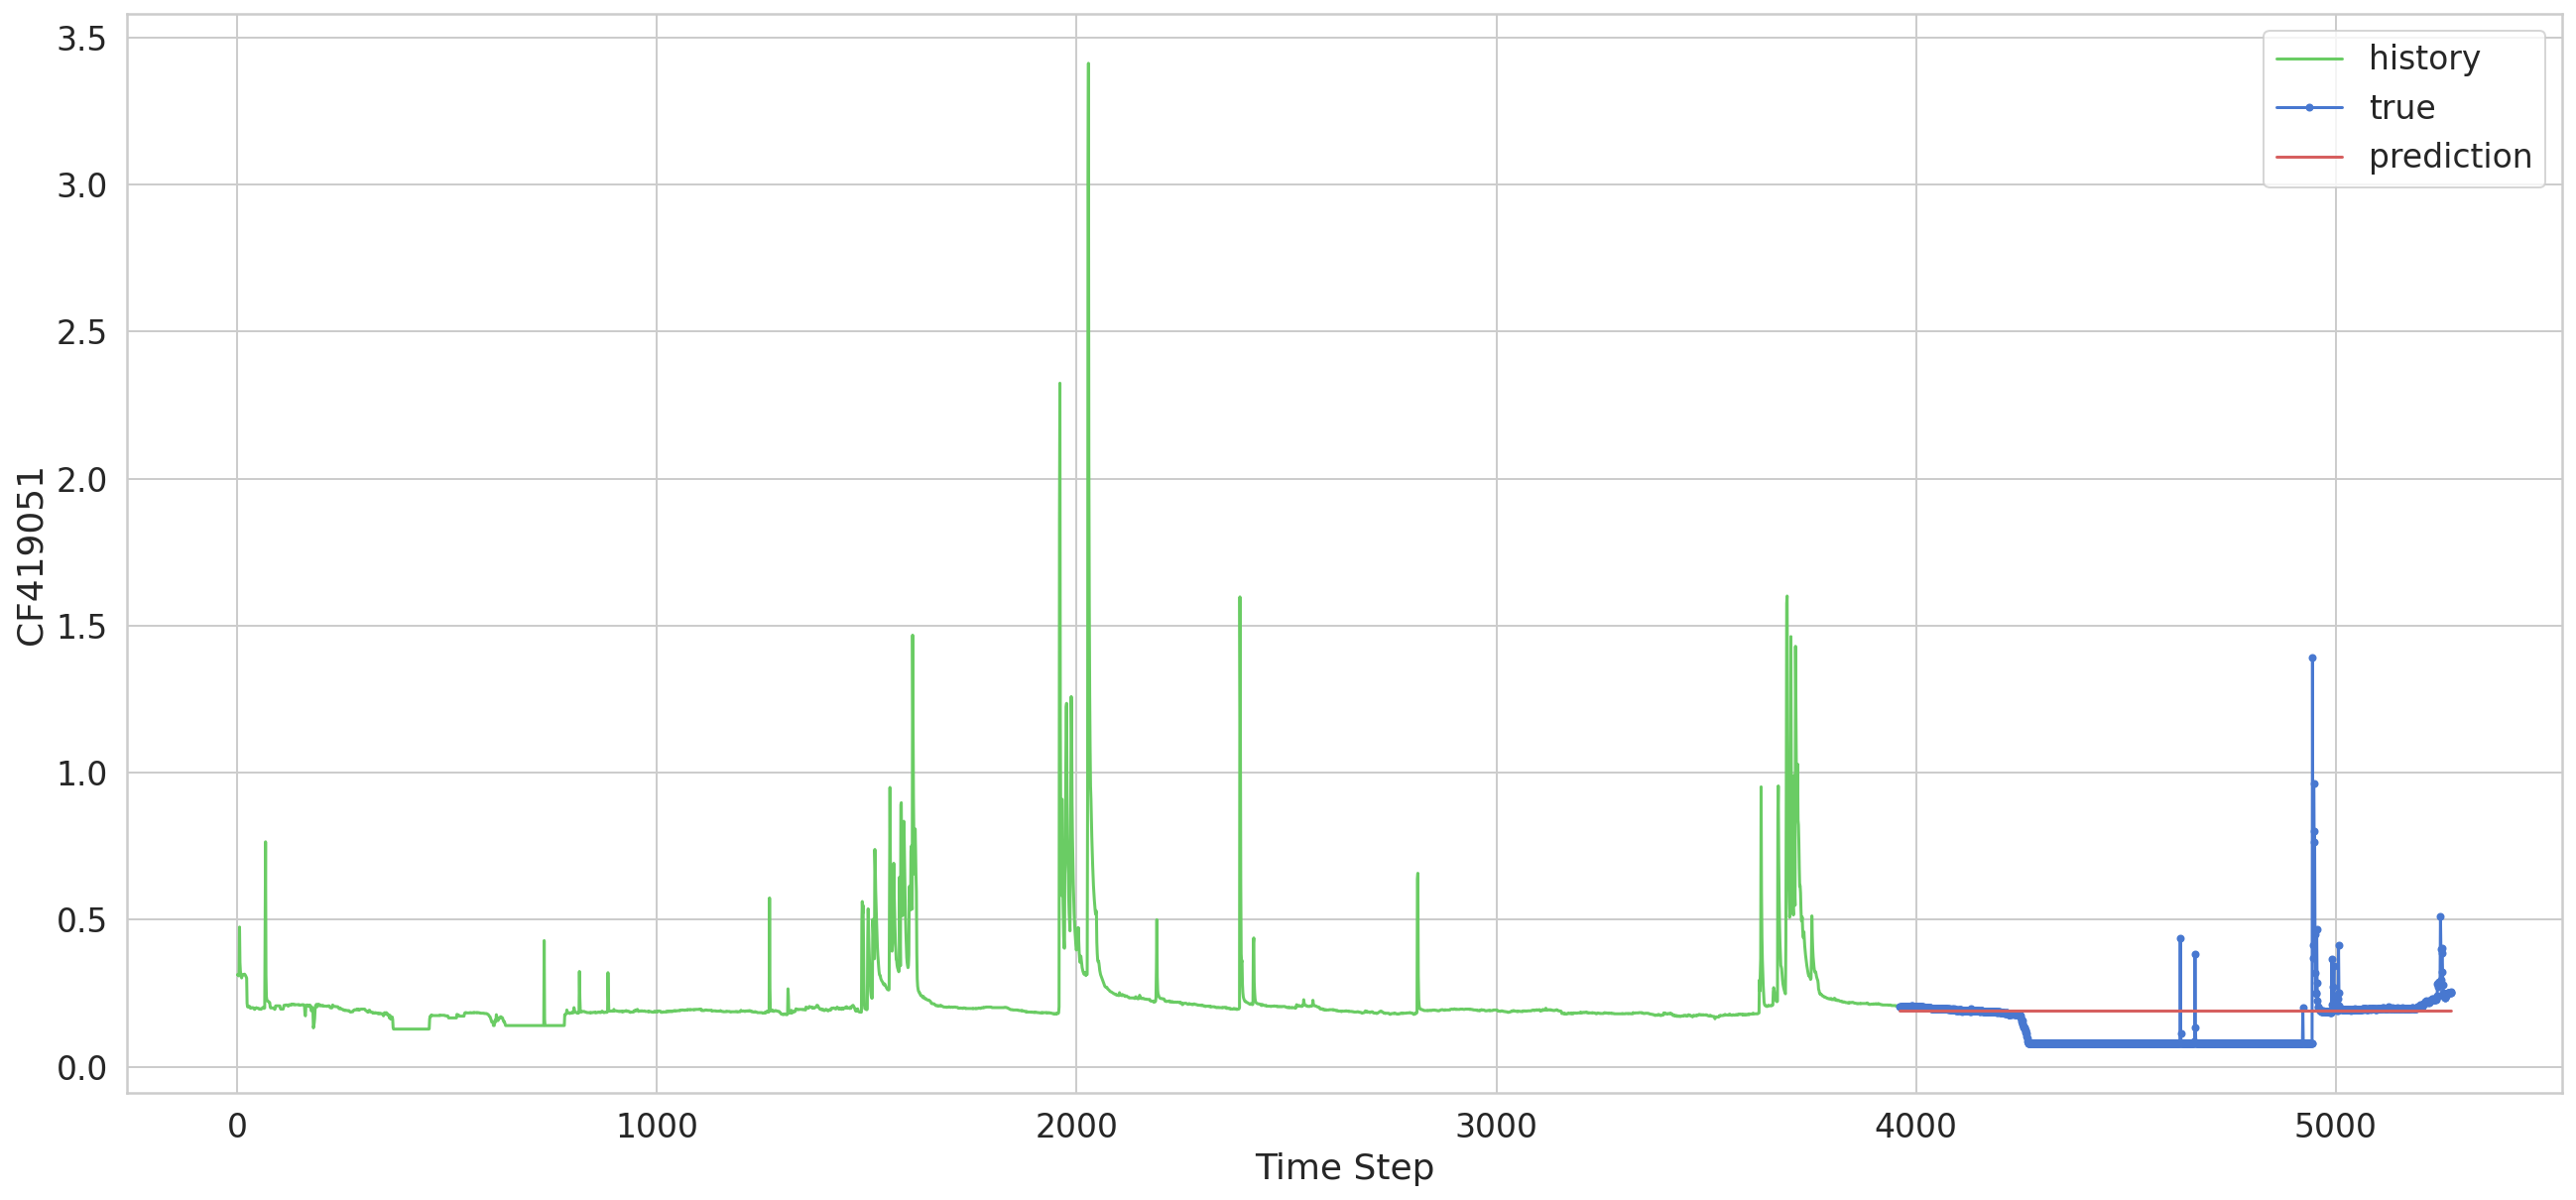

In [70]:
# no invert of scaling

plt.plot(np.arange(0, len(Y_train)), Y_train[:,0], 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,0], marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred[:,0], 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();

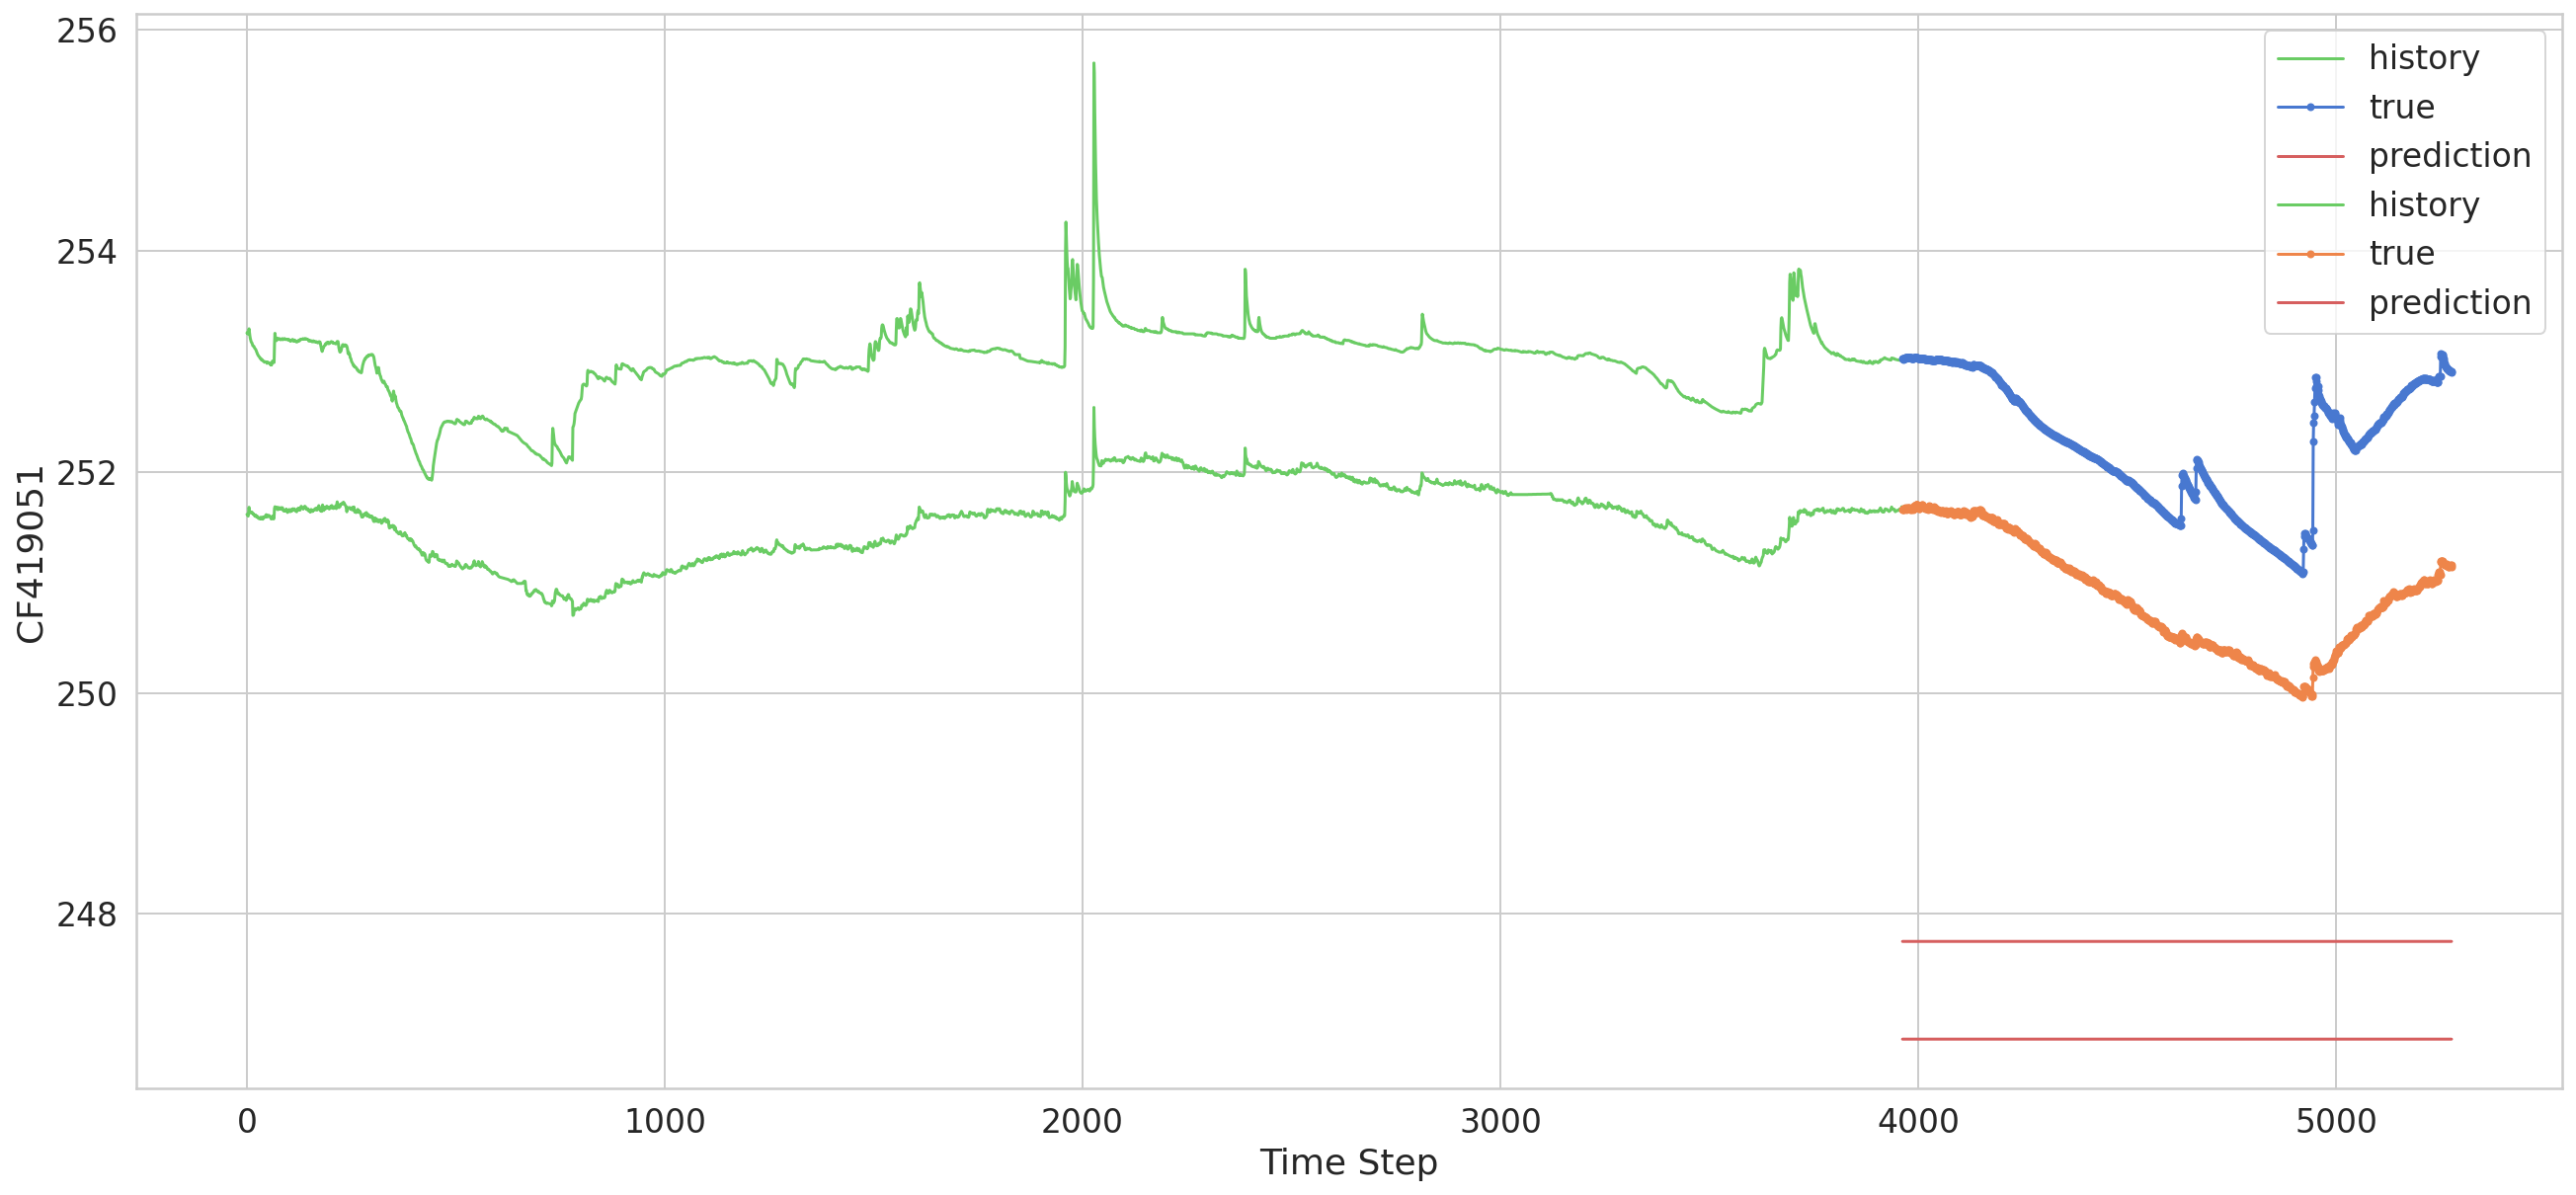

In [71]:
plt.plot(np.arange(0, len(Y_train)), Y_train[:,1], 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,1], marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred[:,1], 'r', label="prediction")
plt.plot(np.arange(0, len(Y_train)), Y_train[:,2], 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,2], marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred[:,2], 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [83]:
Y_pred2 = model2.predict(X_test)

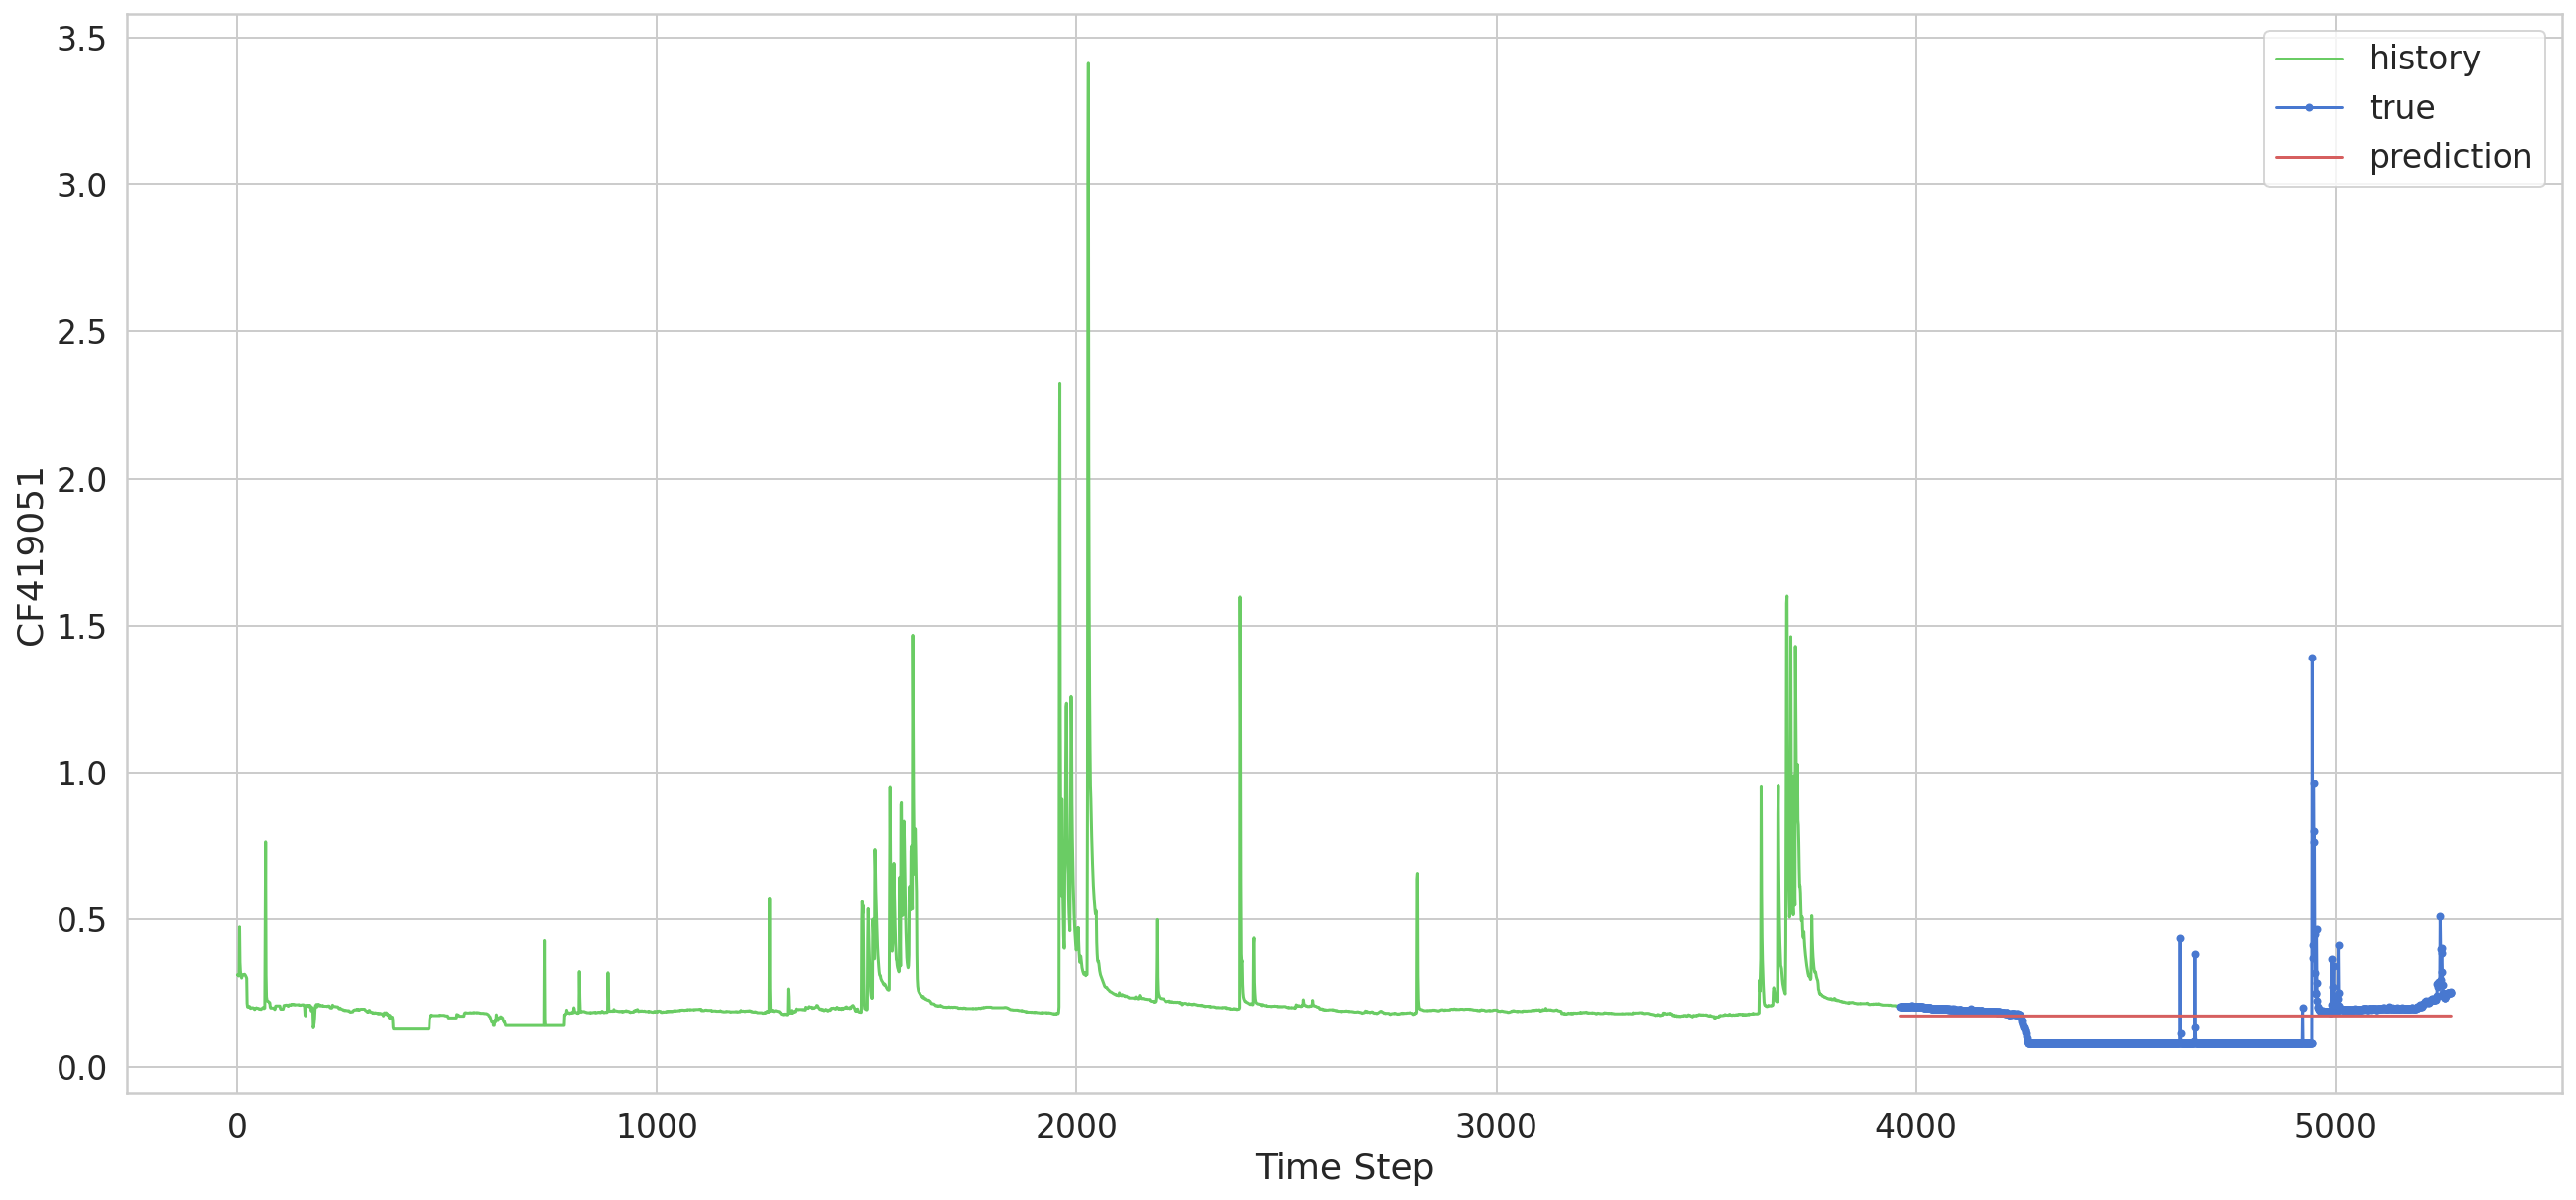

In [85]:
plt.plot(np.arange(0, len(Y_train)), Y_train_inv[:,0].flatten(), 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,0].flatten(), marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred2[:,0].flatten(), 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();

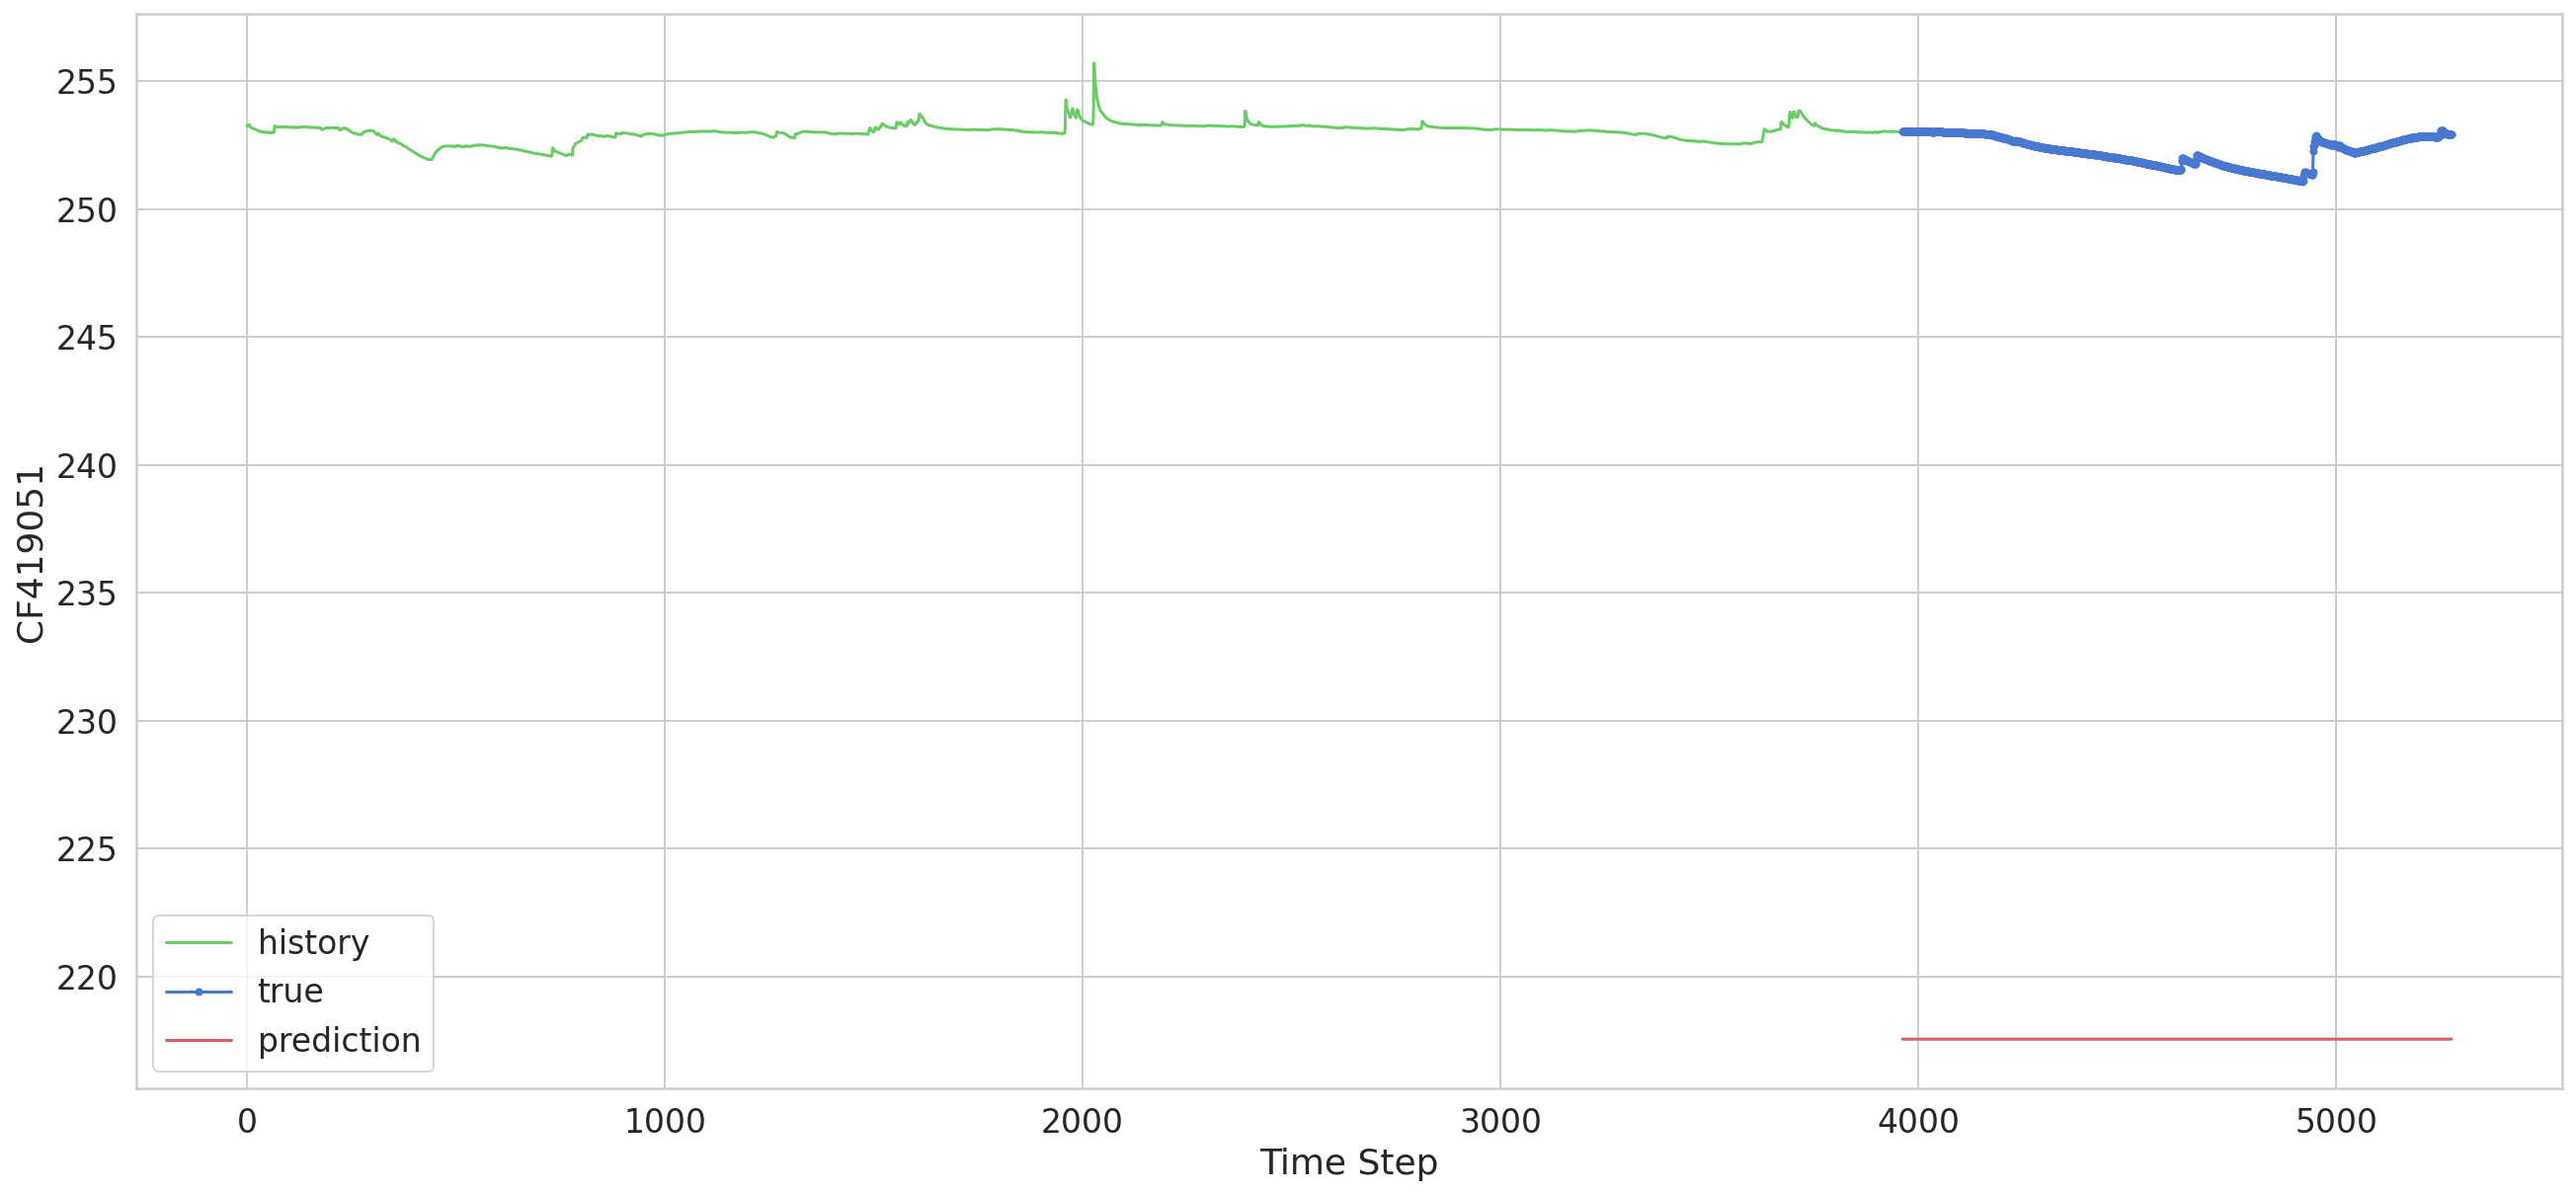

In [86]:
plt.plot(np.arange(0, len(Y_train)), Y_train_inv[:,1].flatten(), 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,1].flatten(), marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred2[:,1].flatten(), 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();

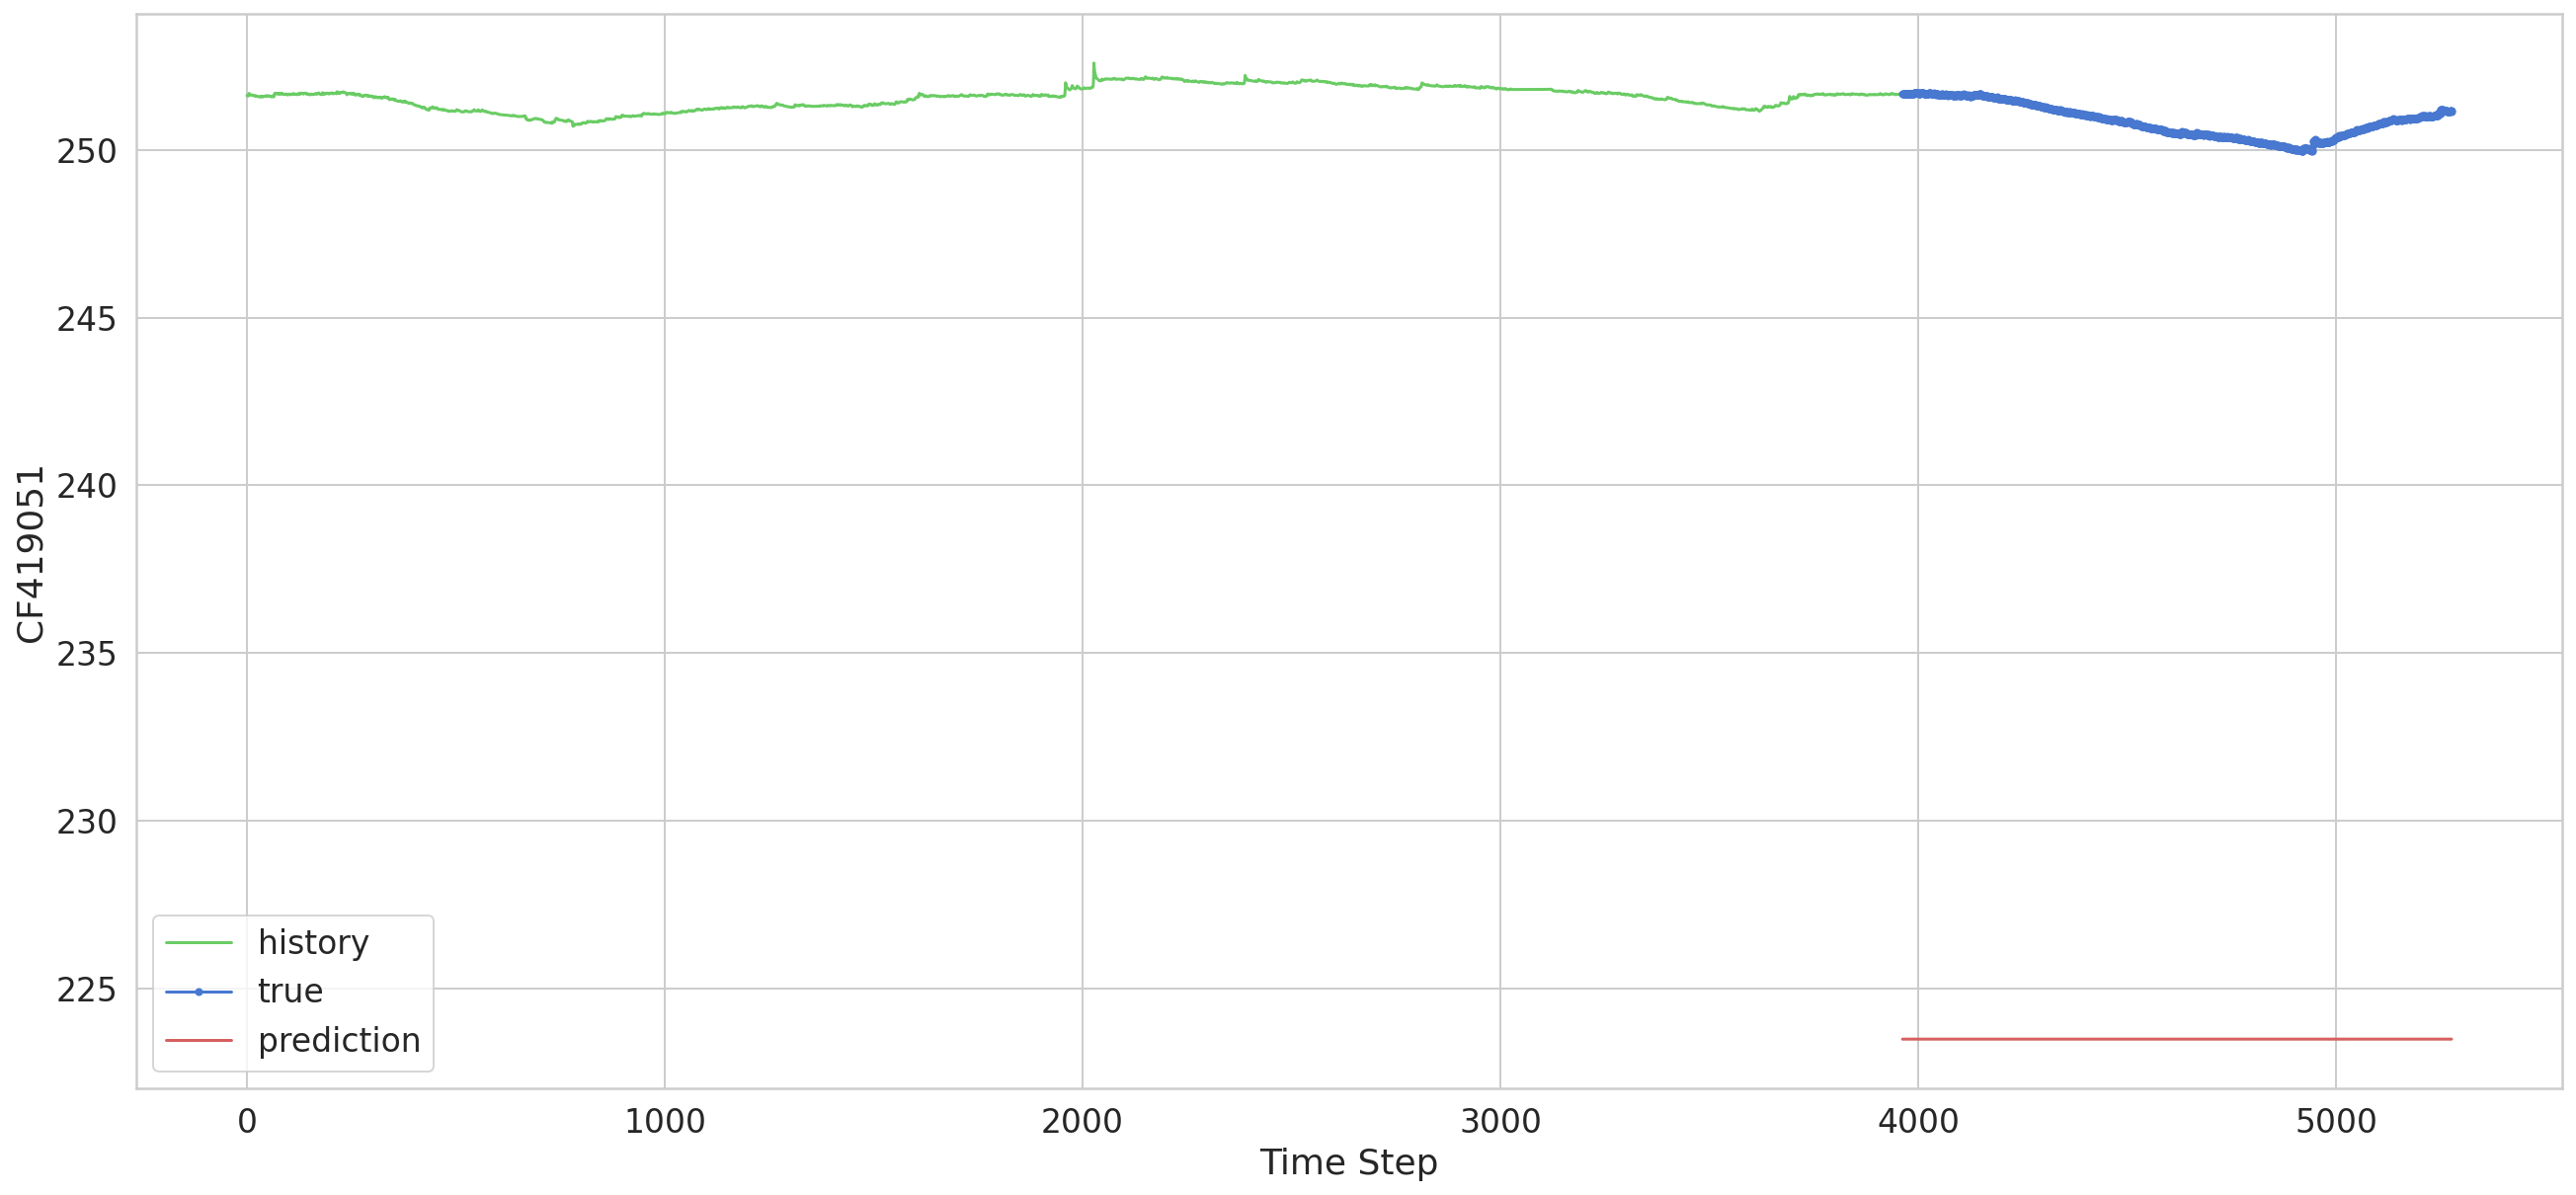

In [87]:
plt.plot(np.arange(0, len(Y_train)), Y_train_inv[:,2].flatten(), 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:,2].flatten(), marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_test)), Y_pred2[:,2].flatten(), 'r', label="prediction")
plt.ylabel('CF419051')
plt.xlabel('Time Step')
plt.legend()
plt.show();